## KNN con Scikit-Learn

Vamos a trabajar con un dataset que es muy conocido, el iris dataset. Acá pueden encontrar más información al respecto:

https://en.wikipedia.org/wiki/Iris_flower_data_set



El conjunto de datos que usaremos es el Iris Flower Dataset (IFD), que fue presentado por primera vez en 1936 por el famoso estadístico Ronald Fisher y consta de 50 observaciones de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor) . Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos. 

**Nuestro objetivo es entrenar el algoritmo KNN para poder distinguir las especies entre sí dadas las medidas de las 4 características.**

Primero debemos importar las librerias y abrir el dataset. Se puede importar desde seaborn

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Y visualizamos de una manera conveniente. ¡Este gráfico es un clásico!

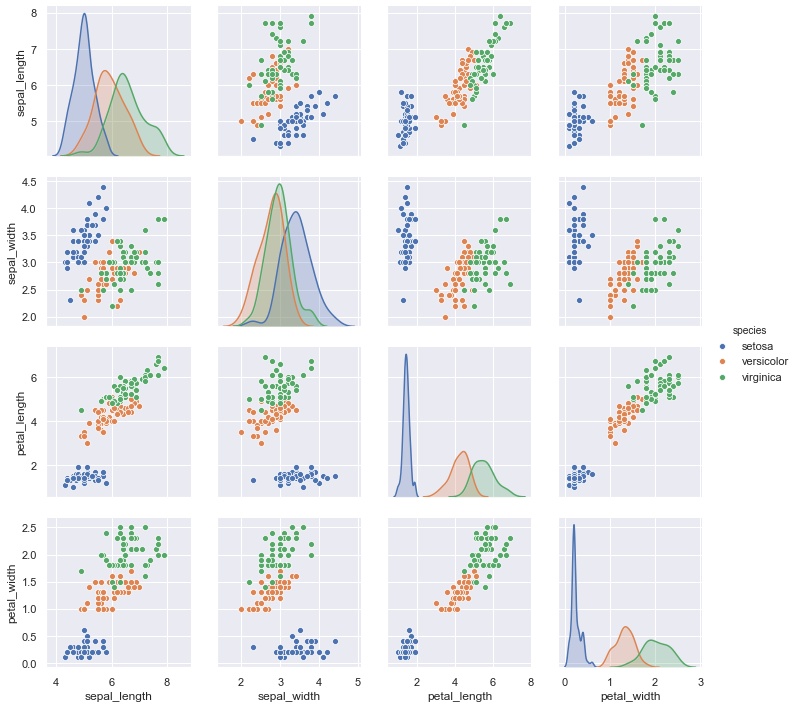

In [3]:
sns.pairplot(iris, hue="species")
plt.show()

Un estudio rápido de los gráficos anteriores revela algunos criterios de clasificación sólidos. Observamos que las setosas tienen pétalos pequeños, la versicolor tiene pétalos de tamaño mediano y la virginica tiene los pétalos más grandes. Además, las setosas parecen tener sépalos más cortos y más anchos que las otras dos clases. Bastante interesante ¿verdad? Sin siquiera usar un algoritmo, hemos logrado construir intuitivamente un clasificador que puede funcionar bastante bien en el conjunto de datos.


Ahora es tiempo de trabajar!!. 

Utilizaremos scikit-learn para entrenar un clasificador KNN y evaluar su rendimiento en el conjunto de datos utilizando el patrón de modelado de 4 pasos:

    Importar el algoritmo de aprendizaje
    Crear el objeto del modelo
    Entrenar el modelo
    Predecir la respuesta

**Ejercicio 1** :Primero necesitamos separar los atributos del target y luego dividir nuestros datos en conjuntos de entrenamiento y prueba. Para eso vamos a usar la libreria sklearn y lo dividimos en train test split

In [4]:
X = iris.drop("species", axis=1)
y = iris.species

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.334,stratify=y,random_state=0)

**Ejercicio 2** :Finalmente, siguiendo el patrón de modelado anterior (Árbol de decisión), definimos nuestro clasificador, en este caso KNN, lo ajustamos a nuestros datos de entrenamiento y evaluamos su precisión. Usaremos una K arbitraria (K=3), pero veremos más adelante cómo se puede usar la validación cruzada para encontrar su valor óptimo.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 1.0


## Ajuste del hiperparámetro K 

En esta sección, exploraremos un método que puede usarse para ajustar el hiperparámetro K.

Más adelante en el curso veremos otras maneras más eficientes y adecuadas de hacerlo.

**Ejercicio 3** :¿Qué ocurre con el desempeño a medida que variamos k? 

In [7]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
   # fitting the model
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)
 
    predtrain = knn.predict(X_train)
    # evaluate accuracy
    print("accuracy test: {}".format(accuracy_score(y_test, pred)))
     # evaluate accuracy
    print("accuracy train: {}".format(accuracy_score(y_train, predtrain)))
    cv_scores.append(accuracy_score(y_test, pred))

accuracy test: 0.9803921568627451
accuracy train: 1.0
accuracy test: 1.0
accuracy train: 0.9393939393939394
accuracy test: 0.9803921568627451
accuracy train: 0.9595959595959596
accuracy test: 0.9803921568627451
accuracy train: 0.9595959595959596
accuracy test: 0.9803921568627451
accuracy train: 0.9696969696969697
accuracy test: 0.9803921568627451
accuracy train: 0.9494949494949495
accuracy test: 0.9607843137254902
accuracy train: 0.9595959595959596
accuracy test: 0.9607843137254902
accuracy train: 0.9494949494949495
accuracy test: 0.9607843137254902
accuracy train: 0.9393939393939394
accuracy test: 0.9607843137254902
accuracy train: 0.9494949494949495
accuracy test: 0.9607843137254902
accuracy train: 0.9292929292929293
accuracy test: 0.9607843137254902
accuracy train: 0.9292929292929293
accuracy test: 0.9803921568627451
accuracy train: 0.9393939393939394
accuracy test: 0.9607843137254902
accuracy train: 0.9494949494949495
accuracy test: 0.9607843137254902
accuracy train: 0.929292929292

**Ejercicio 4** : Ahora gráfiquemos!

The optimal number of neighbors is 3


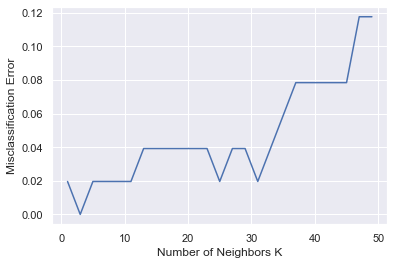

In [8]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


# Definir y visualizar las fronteras de decisión

**Ejercicio 5** :¿Cómo se modifican las fronteras a medida que cambian el k? Seleccionar un rango y probar (completar donde dice None)

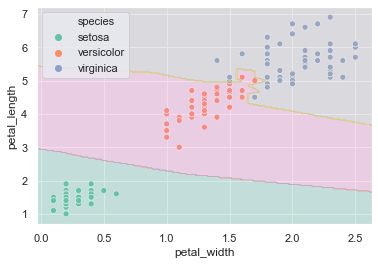

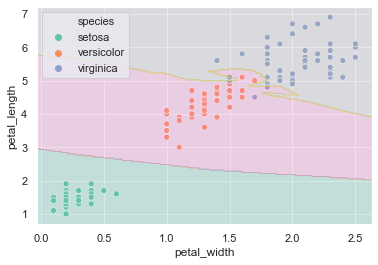

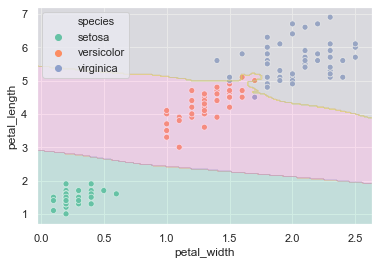

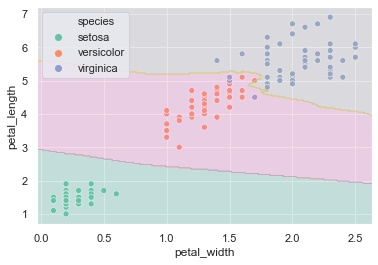

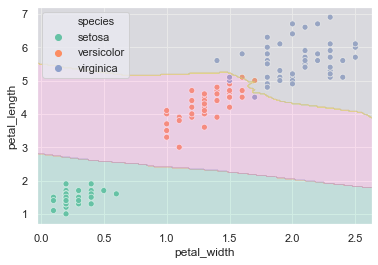

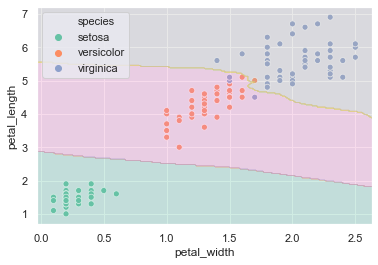

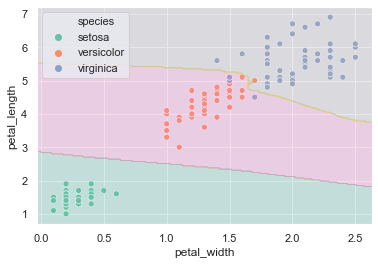

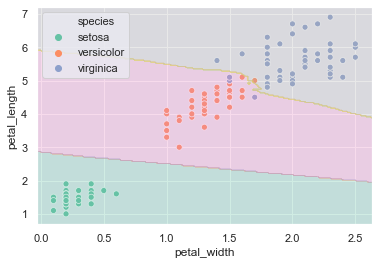

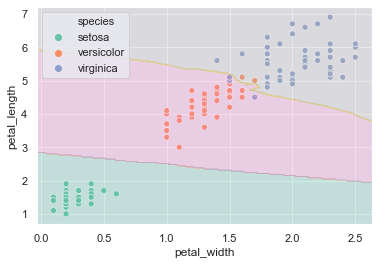

In [9]:
# for weights in ['uniform', 'distance']:
for k in range(1, 10):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k)
    y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})
    clf.fit(X[['petal_width', 'petal_length']], y_train)
    plt.figure()
    ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                              np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

**Para probar**:¿Cómo se modifican las fronteras a medida que cambian el argumento weigth?  ¿Qué hace este argumento?

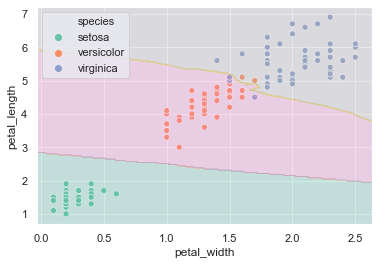

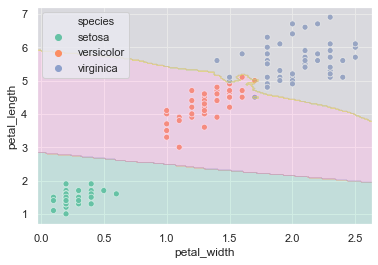

In [10]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k,weights=weights)
    y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})
    clf.fit(X[['petal_width', 'petal_length']], y_train)
    plt.figure()
    ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                              np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

# Comparemos las fronteras de decisión de KNN con el de árboles de decisión

**Para pensar**:¿Qué diferencia encuentra en cuanto a las fronterar? ¿Y a la permorfance? 

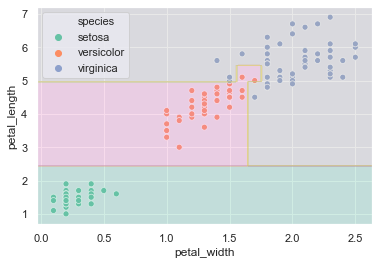

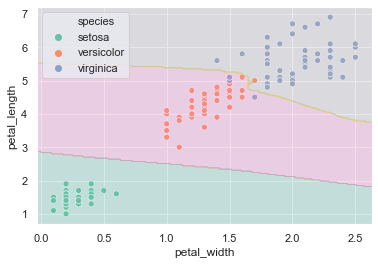

In [11]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 100
clf = DecisionTreeClassifier(max_depth = max_depth,random_state=0)
y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})
clf.fit(X[['petal_width', 'petal_length']], y_train)
plt.figure()
ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

k=7
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(k, weights='uniform')
y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})
clf.fit(X[['petal_width', 'petal_length']], y_train)
plt.figure()
ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

# Ahora hagamos todo desde cero para entender que es lo que hace el modelo

Definamos funciones!!

Hasta ahora, hemos estudiado cómo funciona KNN y hemos visto cómo podemos usarlo para una tarea de clasificación utilizando la canalización genérica de scikit-learn (es decir, ingresar, instanciar, entrenar, predecir y evaluar). Ahora, es hora de profundizar en KNN tratando de codificarlo desde cero.

Un algoritmo de aprendizaje automático generalmente consta de 2 bloques principales:

    un bloque de entrenamiento que toma como entrada los datos de entrenamiento X y el objetivo correspondiente y y genera un modelo aprendido h
    un bloque de predicción que toma como entrada observaciones nuevas e invisibles y usa la función h para dar salida a sus respuestas correspondientes.

En el caso de KNN, que como se discutió anteriormente, es un algoritmo perezoso, el bloque de entrenamiento se reduce a solo memorizar los datos de entrenamiento. Vamos a seguir escribiendo un método de Python que lo haga.

In [12]:
def train(X_train, y_train):
    # do nothing
    return

Ahora tenemos que escribir el método de predicción que debe hacer lo siguiente: necesita calcular la distancia euclidiana entre la observación "nueva" y todos los puntos de datos en el conjunto de entrenamiento. Luego debe seleccionar las K más cercanas y realizar un voto mayoritario. Luego asigna la etiqueta correspondiente a la observación. Vamos a seguir adelante y escribir eso.

In [13]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

En el código anterior, creamos una matriz de distancias que ordenamos por orden creciente. De esa manera, podemos tomar los K vecinos más cercanos (primeras K distancias), obtener sus etiquetas asociadas que almacenamos en la matriz de objetivos y finalmente realizar un voto mayoritario usando un Contador.

En conjunto, podemos definir la función k_nearest_neighbor, que recorre cada ejemplo de prueba y hace una predicción.

In [14]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    # train on the input data
    train(X_train, y_train)

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

Avancemos y ejecutemos nuestro algoritmo con la K óptima que encontramos anteriormente.

In [15]:
# making our predictions
import numpy as np
from collections import Counter

predictions = k_nearest_neighbor(np.array(X_train),np.array(y_train),np.array(X_test),7)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

The accuracy of our classifier is 0.0


98% ¡exactitud! Somos tan buenos como el algoritmo de scikit-learn, pero definitivamente menos eficientes. 

Ahora, ¿qué sucede si volvemos a ejecutar el algoritmo utilizando una gran cantidad de vecinos, como k = 140? Obtenemos un error IndexError: indexar fuera de rango. De hecho, K no puede ser arbitrariamente grande ya que no podemos tener más vecinos que el número de observaciones en el conjunto de datos de entrenamiento. Podemos protegernos de esto comprobando la cordura k con una declaración de afirmación:

In [16]:
def k_nearest_neighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    assert k <= len(X_train), "[!] k can't be larger than number of samples."

    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

¡Eso es todo, acabamos de escribir nuestro primer algoritmo de aprendizaje automático desde cero!

Referencias : https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

# Pros y contras de KNN

*Pros*

Como ya puede ver en la sección anterior, una de las características más atractivas del algoritmo vecino K-más cercano es que es simple de entender y fácil de implementar. Con un tiempo de entrenamiento de cero a poco, puede ser una herramienta útil para el análisis inmediato de algunos conjuntos de datos en los que planea ejecutar algoritmos más complejos. Además, KNN funciona igual de fácil con conjuntos de datos multiclase, mientras que otros algoritmos están codificados para la configuración binaria. Finalmente, como mencionamos anteriormente, la naturaleza no paramétrica de KNN le da una ventaja en ciertas configuraciones donde los datos pueden ser altamente "inusuales".

*Contras*

Uno de los inconvenientes obvios del algoritmo KNN es la fase de prueba computacionalmente costosa que no es práctica en entornos de la industria. Tenga en cuenta la rígida dicotomía entre KNN y la red neuronal más sofisticada que tiene una larga fase de entrenamiento, aunque una fase de prueba muy rápida. Además, KNN puede sufrir distribuciones de clase sesgadas. Por ejemplo, si cierta clase es muy frecuente en el conjunto de entrenamiento, tenderá a dominar la votación mayoritaria del nuevo ejemplo (gran número = más común). Finalmente, la precisión de KNN se puede degradar severamente con datos de alta dimensión porque hay poca diferencia entre el vecino más cercano y el más alejado.